<a href="https://colab.research.google.com/github/durg3sh10/Credit_Card_Fraud_Detection_using_RandomForest/blob/main/Credit_Card_Fraud_Detection_using_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest

Random forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

* For classification tasks, the output of the random forest is the class selected by most trees. 

* For regression tasks, the mean or average prediction of the individual trees is returned.

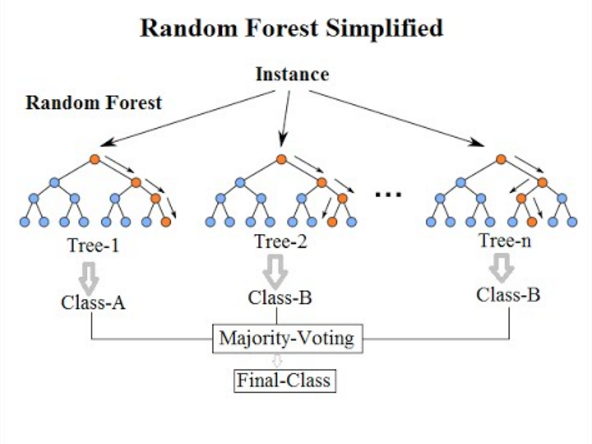

## Dataset Context:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

##Content:

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. 

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.



In [28]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [29]:
# Importing the dataset
credit_df = pd.read_csv('/content/drive/MyDrive/Data science/Alma Better/Machine learning/Ensembles of Decision Trees/Data/Copy of creditcard.csv')
credit_df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,-1.949546,-0.494436,-0.353696,0.158729,-0.267239,0.234802,-0.754936,-0.343012,0.312175,-0.042711,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,-0.587786,0.317419,-0.408521,0.719639,0.226926,-0.296316,-0.040143,0.119177,1.057682,0.926255,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0


In [30]:
# Checking the shape of our data
credit_df.shape

(56962, 30)

In [31]:
# Checking the distribution of two classes in the target variable
credit_df["Target"].value_counts()

0    56864
1       98
Name: Target, dtype: int64

Clearly the dataset is heavily imbalanced!

# Exploratory Data Analysis


It is necessary to determine whether the data we are using has duplicated rows. We are going to identify duplicate rows and remove the duplicate rows.

In [32]:
duplicate_rows = credit_df[credit_df.duplicated()]
duplicate_rows.shape

(675, 30)

In [33]:
credit_df = credit_df.drop_duplicates()
credit_df.shape

(56287, 30)

**Identifying and Handling Missing Data:**

* In my opinion, handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.

* In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed. 

We will detect missing values and handle them in a proper and efficient way by first finding columns with missing values.



In [34]:
# Finding features/columns with Nan values 
features_with_null_values = [feature for feature in credit_df.columns if credit_df[feature].isnull().sum()>1]
features_with_null_values

[]

Dataset contains no missing values

###Divide data into independent variables('x'), Dependent variable('y') based on the problem statement.

In [35]:
# Creating the dataset with all independent variables
x = credit_df.iloc[:,:-1]

# Creating the dataset with the dependent variable
y = credit_df.iloc[:,-1]

####Train - Test Split :
Separating data into training and testing sets is an important part of evaluating data mining models

Using a stratified sampling ensures the distribution of dependent variable remains same across train and test datasets

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0, stratify = y)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(11258, 29)
(45029, 29)
(11258,)
(45029,)


In [37]:
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
0    44951
1       78
Name: Target, dtype: int64

 Distribution of classes of dependent variable in test :
0    11238
1       20
Name: Target, dtype: int64


## Hyperparameter tuning


###Let’s break down what GridSearchCV

####GridSearchCV exhaustively considers all parameter combinations

1. estimator: estimator object being used
2. param_grid: dictionary that contains all of the parameters to try
3. scoring: evaluation metric to use when ranking results
4. cross-validation, the number of cv folds for each combination of parameters

####We will try adjusting the following set of hyperparameters:

n_estimators = number of trees in the foreset

max_depth = max number of levels in each decision tree

min_samples_leaf = min number of data points allowed in a leaf node

In [38]:
classifier = RandomForestClassifier()
parameters = {"n_estimators": [10, 20, 30], "max_depth" : [6, 7, 8], "min_samples_leaf" : [1,2,3]}
grid_classfier = GridSearchCV(estimator= classifier, param_grid = parameters, scoring = "roc_auc", cv = 3)

In [39]:
# Fit the object to train dataset
grid_classfier.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [40]:
grid_classfier.best_params_

{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 20}

In [41]:
grid_classfier.best_score_

0.9698241726219538

###Predicting on both train and test dataset using the fitted model

In [42]:
#Predict on Train Set
train_predict = grid_classfier.predict(x_train)
train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
y_train.values

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
#Predict on Test Set
test_predict = grid_classfier.predict(x_test)
test_predict

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# Obtain accuracy on test set
accuracy_score(y_test, test_predict)

0.9990229170367738

Accuracy is not a good metric to evaluate our model since the dataset is heavily imbalanced. Thus we will use roc_auc score

In [47]:
# Calculate roc_auc score on test set
roc_auc_score(y_test, test_predict)

0.7749110161950525

In [48]:
# Obtain the confusion matrix on test set
cm = confusion_matrix(y_test, test_predict)
cm

array([[11236,     2],
       [    9,    11]])

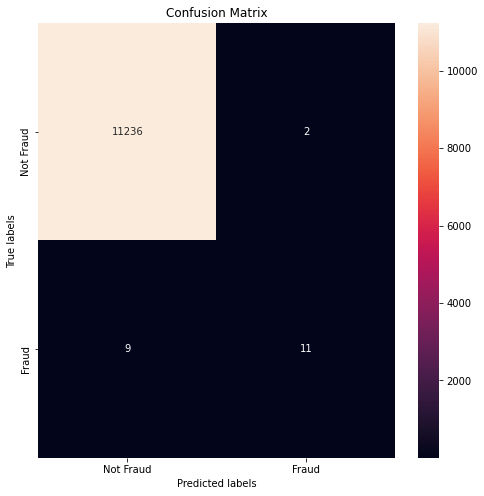

In [49]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = "d") 

# labels, title and ticks
labels = ['Not Fraud', 'Fraud']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

From the confusion matrix we can say that :

True positive (TP): This shows that a model correctly predicted Positive cases as Positive.

False positive (FP): This shows that a model incorrectly predicted Negative cases as Positive.

False Negative (FN): This shows that an incorrectly model predicted Positive cases as Negative.

True Negative (TN): This shows that a model correctly predicted Negative cases as Positive.

In [50]:
precision_score(y_test, test_predict)

0.8461538461538461

In [51]:
recall_score(y_test, test_predict)

0.55

In [52]:
f1_score(y_test, test_predict)

0.6666666666666667

Plot the variable importance

In [53]:
features = x_train.columns
importances = grid_classfier.best_estimator_.feature_importances_
indices = np.argsort(importances)

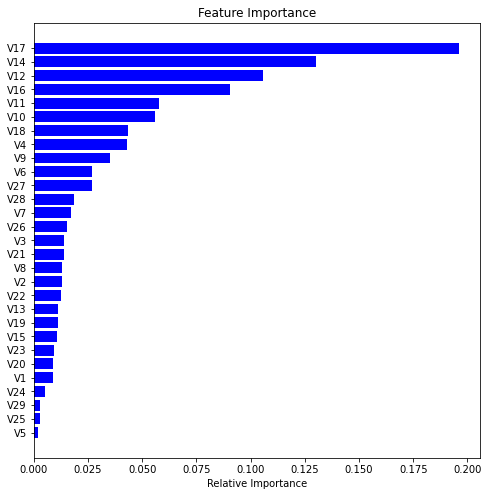

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance');